## UPISATI IME I PREZIME!
# 4. LABORATORIJSKA VJEŽBA - MJERENJE VOĐENIH SMETNJI
---
U ovoj laboratorijskoj vježbi mjerit će se vođene smetnje prekidačkog napajanja prema prikazanoj shemi. U prvom koraku izmjerit će se smetnje napajanja bez filtra, dok će se u drugom koraku analizirati utjecaj filtra.

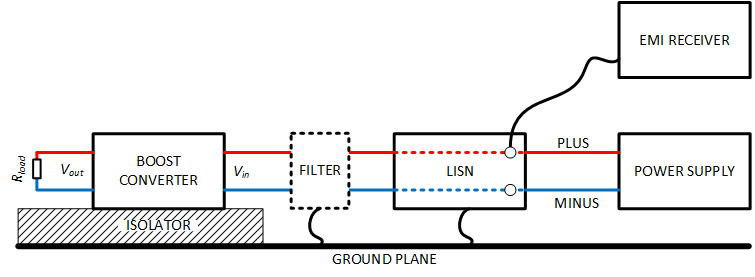

# PRIPREMA
---
1. Proučiti princip rada LISN-a. Znati objasniti razliku u mjerenju na različitim vodovima s obizirom na smjer $I_{DM}$ i $I_{CM}$ struje.
2. Proučiti princip rada mrežnog filtra.

## EMI prijamnik

U ovoj vježbi će se EMI prijamnik koristiti u _Spectrum Mode_ radi veće fleksibilnosti podešenja parametara. Zbog navedene fleksibilnosti EMI prijamnik u _Spectrum Mode_ često se koristi pri izvođenju _precompliance_ mjerenja.<br>
<code><b>MODE</b>->Spectrum</code>
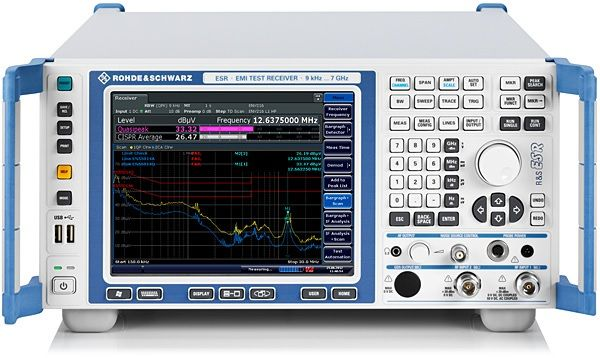

U nastavku su dane granice vođenih smetnji prema CISPR22 standardu za različite klase uređaja i različite detektore EMI prijamnika. Te granice će se koristiti za usporedbu s provedenim mjerenjima.

In [ ]:
def conducted_EMI_limits(type):
    # class A (AVG detector) [dBuV], Class A is designated for use in the commercial, business, and industrial environments
    if type == 'classA_AVG':    
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            mag_limit.append(66)
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(60)    
     
        freq_limit = np.concatenate((freq_limit, freq_temp))  
        label_limit = 'CISPR22 (mains):class A,AVG'
        return mag_limit, freq_limit, label_limit
    
    # class B (AVG detector) [dBuV], Class B is labeled for use in the residential space (PC, calcultator, etc.)
    # class B devices are more likely to be located close to radio and TV receivers in the home environment.
    elif type == 'classB_AVG':        
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            #mag_limit.append((189.2 -25.13*np.log10(freq_temp[i])))
            mag_limit.append((155-19.12*np.log10(freq_temp[i])))
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 5e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(46)    
        freq_limit = np.concatenate((freq_limit, freq_temp))
    
        freq_temp = np.linspace(5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(50)          
            
        freq_limit = np.concatenate((freq_limit, freq_temp))
        label_limit = 'CISPR22 (mains):class B,AVG'
        return mag_limit, freq_limit, label_limit
    
    # class A (QP detector) [dBuV]
    elif type == 'classA_QP': 
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            mag_limit.append(79)
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(73)    
        
        freq_limit = np.concatenate((freq_limit, freq_temp))  
        label_limit = 'CISPR22 (mains):class A,QP'
        return mag_limit, freq_limit, label_limit

    # class B (QP detector) [dBuV]
    elif type == 'classB_QP': 
        freq_temp = np.linspace(0.15e6, 0.5e6, num=100)
        mag_limit = []
        for i in range(len(freq_temp)):
            #mag_limit.append((199.2 -25.13*np.log10(freq_limit[i])))
            mag_limit.append((165 - 19.12*np.log10(freq_temp[i])))
        freq_limit = freq_temp
    
        freq_temp = np.linspace(0.5e6, 5e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(56)    
        freq_limit = np.concatenate((freq_limit, freq_temp))
    
        freq_temp = np.linspace(5e6, 30e6, num=100)
        for i in range(len(freq_temp)):
            mag_limit.append(60)          
        
        freq_limit = np.concatenate((freq_limit, freq_temp))
        label_limit = 'CISPR22 (mains):class B,QP'
        return mag_limit, freq_limit, label_limit

## Laboratorijski izvor E3646A

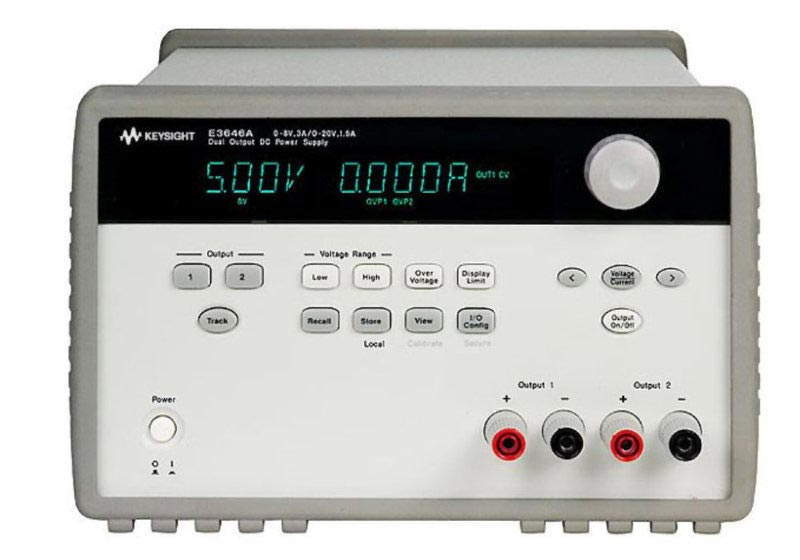

## LISN (eng. _Line Impedance Stabilization Network_)
U ovoj vježbi koristi se LISN koji se bazira na 50 uH zavojnici. U kućištu LISN-a nalaze se dvije mreže kako je prikazano na slici. Izlaz prema EMI prijamniku koji se ne koristi potrebno je zaključiti s 50 Ohma.

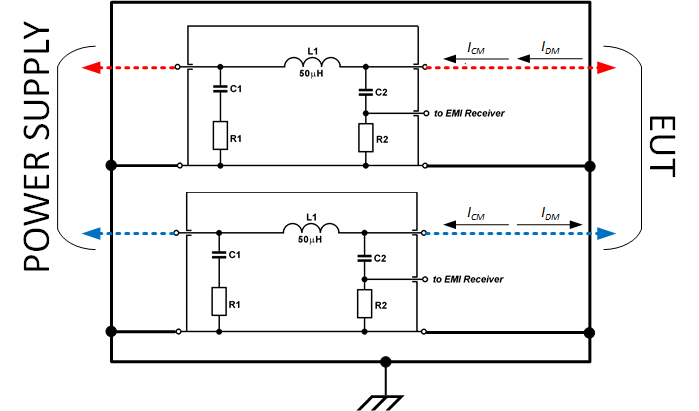

## Mrežni filtar
U drugom dijelu vježbe koristit će se mrežni filtar prikazan na slici.

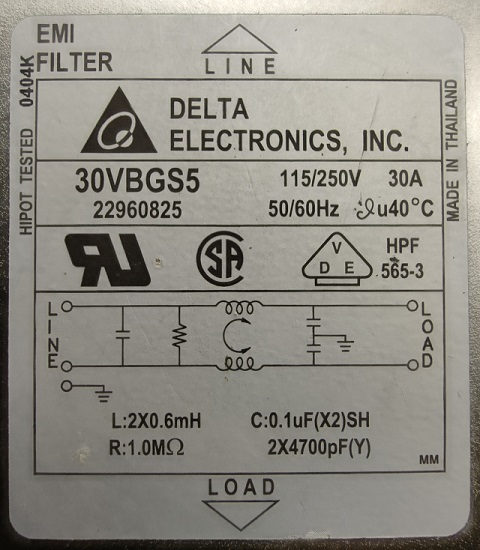

## UZLAZNI DC/DC PRETVARAČ (eng. _boost DC/DC converter_)
U ovoj laboatorijskoj vježbi mjere se vođene smetnje uzlaznog pretvarača baziranog na [TPS61088] (https://www.ti.com/lit/gpn/tps61088). Osnovne karakteristike ovog pretvarača:
- ulazni napon: 2,7 V - 12 V
- izlazni napon: 4,5 V to 12,6 V
- prekidačka struja 10 A
- učinkovitost do 91%
- prekidačka frekvencija: 200 kHz - 2,2 MHz

Cjelovita shema sklopa prikazana je na sljedećoj slici
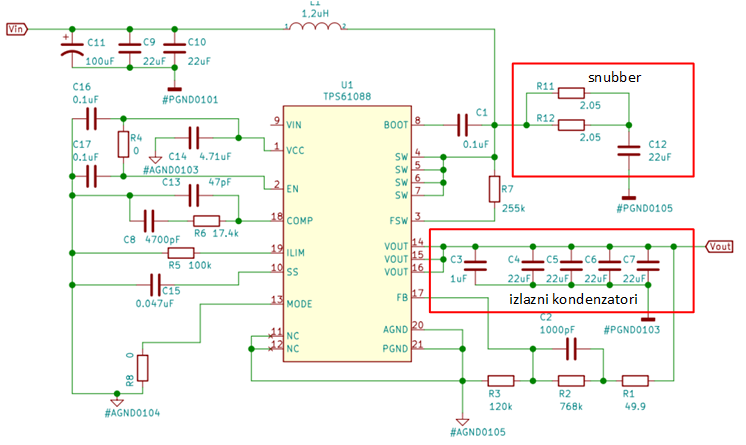

# RAD U LABORATORIJU
---
<b>VAŽNO!</b> Prije početka rada s instrumentom potrebno je staviti uzemljenu narukvicu. Provjerite je li narukvica ispravno spojena na uzemljenje. 

0. S obzirom da se u ovoj laboratorijskoj vježbi komunicira preko GPIB sabirnice s EMI prijamnikom potrebno je lokalno pokrenuti Jupyter Notebook i otvoriti **Labos4.ipynb** koji se nalazi na radnoj površini 
>Pokrenuti _Command Prompt_ i upisati <code>python -m notebook</code> <br> 

1. Na matičnu ploču spojiti prekidačko napajanje s oznakom zadanoj prema tablici. **Obratiti pažnju na orijentaciju naljepnice**. Postavite matičnu ploču zajedno s prekidačkim napajanjem na izolacijsku podlogu od stiropora.
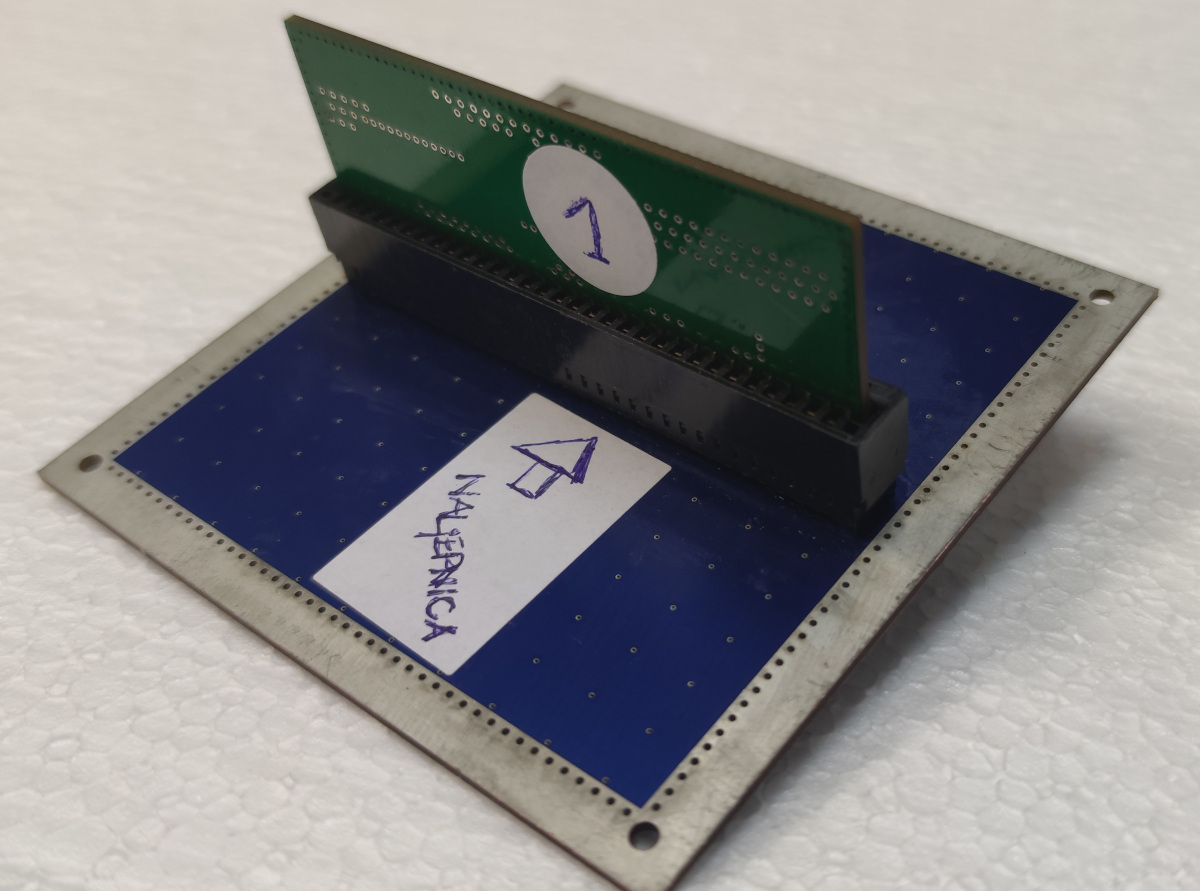


2. Spojiti izlaz prekidačkog napajanja na otpornik zadan prema tablici. Da bi ostvarili zadani iznos koristite kleme odgovarajuću kombinaciju raspoloživih otpornika, a ulaz prekidačkog napajanja na LISN stranu označenu s EUT (**crvena buksna se treba uključiti u utičnicu za mrežno napajanje s oznakom +, a crna buksna se treba uključiti u utičnicu za mrežno napajanje s oznakom -**). U ovom koraku se ne koristi mrežni filtar.

3. Spojiti 1. izlaz (Output 1) laboratorijskog izvora na ulaz LISN-a. Uzemljenje nije potrebno spojiti. 
4. <font color='red'>**Odspojiti EMI prijamnik od LISN-a**</font>. Uključiti EMI prijaminik. 

5. Uključiti laboratorijski izvor i podesiti ulazni napon prekidačkog napajanja na iznos <font color='red'>**5 V**</font> i ograničiti ulaznu struju na <font color='red'>**500 mA**</font>. Za podešavanje točnih vrijednosti koristiti kotačić za podešavanje.
><code> <b>Output</b>->1</code> <br> 
><code> <b>Display Limit</b>->**Voltage**/Current->5 V</code> <br> 
><code> <b>Display Limit</b>->Voltage/**Current**->500 mA</code> <br>

6. Uključiti izlaz laboratorijskog izvora. Da bi se napon pojavio na 1. izlazu potrebno ga je uključiti.
><code> <b>Output On/Off</b></code> <br>

**Provjerite s univerzalnim instrumentom napon na izlaznom otporniku. On bi trebao iznositi ~9 V.** Izračunajte izlaznu snagu na otporniku. Uz pretpostavku da prekidačko napajanje radi s 100% učinkovitosti, uz ulazni napon 5 V izračunajte ulaznu struju i usporedite ju sa strujom prikazanom na laboratorijskom izvoru.
<br>
<br>
<br>
<br>

7. Podesiti sljedeće parametre EMI prijamnika
><code> <b>MODE</b>->Spectrum</code> <br> 
><code> <b>FREQ</b>->Start->150 kHz</code> <br>
><code> <b>FREQ</b>->Stop->30 MHz</code> <br>
><code> <b>AMPT</b>->Unit->dBuV</code> <br>
><code> <b>AMPT</b>->Ref Level->106 dBuV</code> <br>
><code> <b>AMPT</b>->RF Atten Manual->40 dB</code> <br>
><code> <b>SWEEP</b>->Sweep Points->8001</code> <br>
><code> <b>SWEEP</b>->Sweep Count->30</code> <br>
><code> <b>INPUT/OUTPUT</b>->Input AC</code> <br>

8. Spojiti izlaz LISN-a koji odgovara pozitivnom vodu napajanja na EMI prijamnik. Drugi izlaz LISN-a zaključiti s impedancijom iznosa 50 $\Omega$.

10. Postaviti RBW na 9 kHz i VBW na 100 kHz
><code> <b>BW</b>->Res BW Manual->9 kHz</code> <br>
><code> <b>BW</b>->Video BW Manual->100 kHz</code> <br>

11. Za Trace 1 postaviti način prikaza na _Average_ i odabrati _average_ detektor.
><code> <b>TRACE</b>->Trace 1->Clear/Write</code> <br>
><code> <b>TRACE</b>->Trace 1->Detector Man->Average</code> <br>
><code> <b>TRACE</b>->Trace 1->Average</code> <br>

12. <b>Pričekati da mjerenje završi (30 usrednjavanja)</b> <br>

12. Uspostaviti komunikaciju s EMI prijamnikom. Ako je komunikacija uspješno uspostavljena po izvršenju koda ispisat će se ID EMI prijamnika. EMI prijamnik će na svom ekranu ispisati _Remote Mode_. Da bi se prikazao mjereni spektar na ekranu EMI prijamnika potrebno je omogućiti _Display Update->On_.

In [ ]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

rm = pyvisa.ResourceManager()
rm.list_resources()
inst = rm.open_resource('GPIB0::20::INSTR')
print(inst.query("*IDN?"))

13. Pohraniti mjereni frekvencijski spektar vođenih smetnji na **pozitivnom vodu** napajanja.

In [ ]:
# učitavanje frekvencijskog spektra EMI prijamnika
spectrum=inst.query("TRAC? TRACE1")
frequency=inst.query("TRACe:DATA:X? TRACE1")
# pretvorba u np.array
y = np.array(spectrum.split(','))
y = y.astype(float)
x = np.array(frequency.split(','))
x = x.astype(float)
# pohranjivanje mjerenja u datoteku
np.savetxt('meas1.csv', np.transpose([x,y]), delimiter=',')
label1 = 'mjerenje (+)'

14. Spojiti izlaz LISN-a koji odgovara negativnom vodu napajanja na EMI prijamnik. Drugi izlaz LISN-a zaključiti s impedancijom iznosa 50 $\Omega$.

15. Odabrati _Local_ na ekranu EMI prijamnika i pokrenuti novo usrednjavanje.
><code> <b>TRACE</b>->Trace 1->Clear/Write</code> <br>
><code> <b>TRACE</b>->Trace 1->Average</code> <br>

16. <b>Pričekati da mjerenje završi (30 usrednjavanja)</b> <br>
17. Pohraniti mjereni frekvencijski spektar vođenih smetnji na **negativnom vodu** napajanja.

In [ ]:
# učitavanje frekvencijskog spektra EMI prijamnika
spectrum=inst.query("TRAC? TRACE1")
frequency=inst.query("TRACe:DATA:X? TRACE1")
# pretvorba u np.array
y = np.array(spectrum.split(','))
y = y.astype(float)
x = np.array(frequency.split(','))
x = x.astype(float)
# pohranjivanje mjerenja u datoteku
np.savetxt('meas2.csv', np.transpose([x,y]), delimiter=',')
label2 = 'mjerenje (-)'

18. Prikazati oba mjerenja i usporediti ih s dozvoljenim granicama vođenih smetnji za klasu B prema CISPR 22 standardu.

In [ ]:
# učitavanje granica
mag, freq, label = conducted_EMI_limits('classB_AVG')

# učitavanje mjerenja
temp = np.loadtxt('meas1.csv',delimiter=',')
temp = np.transpose(temp)
frequency1 = temp[0]
spectrum1 = temp[1]

temp = np.loadtxt('meas2.csv',delimiter=',')
temp = np.transpose(temp)
frequency2 = temp[0]
spectrum2 = temp[1]

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca() 
axes.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [MHz]')    
plt.title('Slika 1.')
plt.ylabel('Napon [dBuV]')
axes.plot(frequency1/1e6,spectrum1, linestyle='-',label=label1, linewidth=3)
axes.plot(frequency2/1e6,spectrum2, linestyle='-',label=label2, linewidth=3)
axes.plot(freq/1e6,mag, linestyle=':',label=label, linewidth=3, color='r')
leg = axes.legend()

19. Na kojoj frekvenciji radi prekidačko napajanje? Što znači kada su mjerene smetnje različite na pozitivnom i negativnom vodu napajanja? Znači li to da su dominantne diferencijske ili zajedničke smetnje? Koliki je maksimalni iznos smetnji?
<br>
<br>
<br>
<br>

20. <font color='red'>**Odspojiti EMI prijamnik od LISN-a**</font>
21. Isključiti izlaz laboratorijskog izvora
><code> <b>Output On/Off</b></code> <br>
22. Spojiti mrežni filtar na ulaz prekidačkog napajanja. <font color='red'>**Obratiti pažnju na orijentaciju utičnice**, **Ostvarite dobar spoj filtra s plohom uzemljenja**, **Probajte zadržati istu poziciju matične ploče i kabela kao i u prethodnim mjerenjima**</font> 
23. Uključiti izlaz laboratorijskog izvora. Da bi se napon pojavio na 1. izlazu potrebno ga je uključiti.
><code> <b>Output On/Off</b></code> <br>

**Provjerite s univerzalnim instrumentom napon na izlaznom otporniku. On bi trebao iznositi ~9 V.**

24. Spojiti izlaz LISN-a koji odgovara pozitivnom vodu napajanja na EMI prijamnik. Drugi izlaz LISN-a zaključiti s impedancijom iznosa 50 $\Omega$. Pokrenuti mjerenje spektra
25. Omogućiti lokalno upravljanje s instrumentom _Local_. Pokrenuti usrednjavanje za Trace 1.
><code> <b>TRACE</b>->Trace 1->Clear/Write</code> <br>
><code> <b>TRACE</b>->Trace 1->Average</code> <br>

26. <b>Pričekati da mjerenje završi (30 usrednjavanja)</b> <br>
27. Pohraniti mjereni frekvencijski spektar vođenih smetnji na **pozitivnom vodu** napajanja.

In [ ]:
# učitavanje frekvencijskog spektra EMI prijamnika
spectrum=inst.query("TRAC? TRACE1")
frequency=inst.query("TRACe:DATA:X? TRACE1")
# pretvorba u np.array
y = np.array(spectrum.split(','))
y = y.astype(float)
x = np.array(frequency.split(','))
x = x.astype(float)
# pohranjivanje mjerenja u datoteku
np.savetxt('meas3.csv', np.transpose([x,y]), delimiter=',')
label3 = 'mjerenje (+)+filtar'

28. Prikazati mjerenja na pozitivnom vodu napajanja s i bez filtra i usporediti ih s dozvoljenim granicama vođenih smetnji za klasu B prema CISPR 22 standardu.

In [ ]:
# učitavanje granica
mag, freq, label = conducted_EMI_limits('classB_AVG')

# učitavanje mjerenja na pozitivnom vodu
temp = np.loadtxt('meas1.csv',delimiter=',')
temp = np.transpose(temp)
frequency1 = temp[0]
spectrum1 = temp[1]

# učitavanje mjerenja na negativnom vodu
temp = np.loadtxt('meas3.csv',delimiter=',')
temp = np.transpose(temp)
frequency2 = temp[0]
spectrum2 = temp[1]

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca() 
axes.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [MHz]')    
plt.title('Slika 2.')
plt.ylabel('Napon [dBuV]')
axes.plot(frequency1/1e6,spectrum1, linestyle='-',label=label1, linewidth=3)
axes.plot(frequency2/1e6,spectrum2, linestyle='-',label=label3, linewidth=3)
axes.plot(freq/1e6,mag, linestyle=':',label=label, linewidth=3, color='r')
leg = axes.legend()

29. Objasniti dobivene rezultate.
<br>
<br>
<br>
<br>